In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#DataLoader" data-toc-modified-id="DataLoader-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DataLoader</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Show-batches" data-toc-modified-id="Show-batches-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Show batches</a></span></li></ul></li></ul></li><li><span><a href="#Load-Classifier" data-toc-modified-id="Load-Classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Classifier</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#ResNet18" data-toc-modified-id="ResNet18-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>ResNet18</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Fine-tuning" data-toc-modified-id="Fine-tuning-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Fine-tuning</a></span></li><li><span><a href="#Original-size" data-toc-modified-id="Original-size-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Original size</a></span></li></ul></li><li><span><a href="#ResNet34" data-toc-modified-id="ResNet34-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>ResNet34</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Training</a></span></li></ul></li></ul></li><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Interpretation</a></span></li><li><span><a href="#Export" data-toc-modified-id="Export-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Export</a></span></li><li><span><a href="#Old" data-toc-modified-id="Old-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Old</a></span></li></ul></div>

In [ ]:
#export
from exp.nb_03c import *

In [ ]:
fastai.__version__

'2.1.8'

In [ ]:
torch.__version__

'1.7.0'

In [ ]:
torch.cuda.device_count(), torch.cuda.is_available()

(1, True)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
!nvidia-smi

Mon Jan 11 16:24:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 450.36.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P5000        On   | 00000000:00:05.0 Off |                  Off |
| 26%   33C    P5     9W / 180W |      4MiB / 16278MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Load data

In [ ]:
print_competition_data()

data/severstal/sample_submission.csv
data/severstal/train.csv
data/severstal/labels
data/severstal/train_images
data/severstal/test_images
data/severstal/.ipynb_checkpoints
data/severstal/codes.txt


In [ ]:
train.head(2)

,ImageId,ClassId,EncodedPixels,ImageId_ClassId
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 30370 24 30626 24 30882 24 31139 23 31395 23 31651 23 31907 23 32163 23 32419 23 32675 23 77918 27 78174 55 78429 60 78685 64 78941 68 79197 72 79452 77 79708 81 79964 85 80220 89 80475 94 80731 98 80987 102 81242 105 81498 105 81754 104 82010 104 82265 105 82521 31 82556 69 82779 27 82818 63 83038 22 83080 57 83297 17 83342 50 83555 13 83604 44 83814 8 83866 37 84073 3 84128 31 84390 25 84652 18 84918 8 85239 10 85476 29 85714 47 85960 57 86216 57 86471 58 86727 58 86983 58 87238 59 87494 59 87750 59 88005 60 88261 60 88517 60 88772 61 89028 53...,0002cc93b.jpg_1
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 110 19859 110 20115 110 20371 110 20627 110 20883 110 21139 110 21395 110 21651 110 21962 55 293125 251 293381 251 293637 251 293893 251 294149 251 294405 251 294661 251 294917 251 295173 251 295429 251 295685 251 295941 251 296197 251 296453 251 296709 251 296965 251 297221 251 297477 251 297733 251 297989 251 298245 251 298564 188 298945 63,0007a71bf.jpg_3


In [ ]:
train_all.head(2)

,ImageId,ClassId,EncodedPixels,ImageId_ClassId,status
0,054190eb2.jpg,3,214491 3 214743 7 214995 12 215247 16 215499 21 215751 25 216003 29 216254 35 216506 39 216758 44 217010 48 217262 52 217514 57 217766 61 218019 65 218274 66 218529 67 218784 69 219039 70 219293 73 219548 74 219803 76 220058 77 220313 78 220568 80 220823 81 221078 83 221333 84 221588 85 221843 87 222097 89 222352 91 222607 92 222862 93 223117 95 223372 96 223627 98 223882 99 224137 100 224392 101 224647 102 224901 103 225156 104 225411 105 225666 106 225921 107 226176 108 226431 109 226686 110 226941 110 227196 111 227451 112 227705 114 227960 115 228215 116 228470 117 228725 118 228980 11...,054190eb2.jpg_3,faulty
1,73aa2aa79.jpg,0,NaN,NaN,no_faulty


In [ ]:
train_multi.head(5)

ClassId,ImageId,ClassId_multi
0,0002cc93b.jpg,1
1,00031f466.jpg,0
2,000418bfc.jpg,0
3,000789191.jpg,0
4,0007a71bf.jpg,3


# DataLoader

In [ ]:
labels_dir = path / "labels"
classes = [0, 1, 2, 3, 4]

In [ ]:
#export
pattern_imgs = ['000789191.jpg', '00d7ae946.jpg', '01b237ab8.jpg', '01d590c5f.jpg',
       '01e501f99.jpg', '023353d24.jpg', '031614d60.jpg', '03395a3da.jpg',
       '047681252.jpg', '063b5dcbe.jpg', '06a86ee90.jpg', '07cb85a8d.jpg',
       '07e8fca73.jpg', '08e21ba66.jpg', '092c1f666.jpg', '0a3bbea4d.jpg',
       '0a46cc4bf.jpg', '0a5a82b86.jpg', '0a65bd8d4.jpg', '0a76ac9b8.jpg',
       '0b3a0fabe.jpg', '0b50b417a.jpg', '0d0c21687.jpg', '0d22de6d4.jpg',
       '0e09ff3bd.jpg', '0e3ade070.jpg', '0e479a15f.jpg', '0ec90edd8.jpg',
       '0ef4bff49.jpg', '0faa71251.jpg', '0fab4b372.jpg', '0fac62a3e.jpg',
       '100de36e9.jpg', '109fbcecf.jpg', '110e63bfa.jpg', '11872c662.jpg',
       '11b60701f.jpg', '1205a8e2b.jpg', '12e5fd049.jpg', '12ef6188f.jpg',
       '13cf44f8d.jpg', '140c6ef91.jpg', '14b5ab5a6.jpg', '174528b1d.jpg',
       '175a25522.jpg', '175d95f92.jpg', '17a2d22f7.jpg', '17e6e4b30.jpg',
       '17e7e1e08.jpg', '18262cbbb.jpg', '1841b3825.jpg', '1844b698a.jpg',
       '184eb988e.jpg', '18af1ceb1.jpg', '18cc39190.jpg', '18cc78e81.jpg',
       '18dfcd9ae.jpg', '18e2f6396.jpg', '193732cc8.jpg', '194e207f7.jpg',
       '1a20228f6.jpg', '1a4ac4d43.jpg', '1a759ef19.jpg', '1aa7e1c47.jpg',
       '1bb316ba4.jpg', '1bec34f9a.jpg', '1c2b72b46.jpg', '1d4b011c7.jpg',
       '1d849ef03.jpg', '1dfd53dbb.jpg', '1e28fa5c3.jpg', '1e351863b.jpg',
       '1ee9359c6.jpg', '1f151ee84.jpg', '1f2c14ca8.jpg', '1f9f854f3.jpg',
       '1fcabeee5.jpg', '1fccd2eed.jpg', '1fd758653.jpg', '2059da9eb.jpg',
       '219cd030a.jpg', '21d2b3168.jpg', '220129a97.jpg', '223e550cc.jpg',
       '22757e90a.jpg', '22d94f944.jpg', '230ce1940.jpg', '2338ed2ae.jpg',
       '2441b5d16.jpg', '249b7d301.jpg', '255a79790.jpg', '25bc3a693.jpg',
       '26103f6a4.jpg', '26364af58.jpg', '26bcc93ff.jpg', '26e034336.jpg',
       '277c7771d.jpg', '27f331654.jpg', '2854206dc.jpg', '295e39efa.jpg',
       '2995f68a3.jpg', '29c3aaed7.jpg', '2a8096ad1.jpg', '2ab6eed56.jpg',
       '2acd6db1e.jpg', '2b06b596f.jpg', '2c14af3b2.jpg', '2c213b074.jpg',
       '2c67e770e.jpg', '2c8a82986.jpg', '2cf9289c4.jpg', '2d3c47b87.jpg',
       '2d7a69b1f.jpg', '2dd1084fb.jpg', '2e0ef2076.jpg', '2e4308ede.jpg',
       '2eb20e316.jpg', '2f2afbcc4.jpg', '2f473296b.jpg', '2fdafaf26.jpg',
       '303613d84.jpg', '3046d724c.jpg', '306415665.jpg', '30979541d.jpg',
       '329153502.jpg', '33691f767.jpg', '33a835109.jpg', '33e7b3469.jpg',
       '341952a36.jpg', '348bfe68e.jpg', '3503a107c.jpg', '3573170d7.jpg',
       '358e87349.jpg', '35d245aa8.jpg', '3615f1d69.jpg', '364e66340.jpg',
       '366248602.jpg', '36a630d2a.jpg', '374a718ca.jpg', '37f6b9fe0.jpg',
       '383793f65.jpg', '386a3b711.jpg', '386e34822.jpg', '387deae63.jpg',
       '3887e646f.jpg', '38fc3c6f5.jpg', '396851647.jpg', '3977fffae.jpg',
       '3996e2b5c.jpg', '39ac947b9.jpg', '3c0a7290f.jpg', '3c0b48018.jpg',
       '3c6c3dbf1.jpg', '3c9ce987e.jpg', '3d577cf47.jpg', '3e7d00bf4.jpg',
       '3f4cb099f.jpg', '3fdc767bf.jpg', '3feed5ab3.jpg', '404a89d7b.jpg',
       '405f55b63.jpg', '41ddf91f7.jpg', '422003263.jpg', '4281f5d71.jpg',
       '42e6b0f02.jpg', '44c7ae7bc.jpg', '44eaa8416.jpg', '453cb7bd8.jpg',
       '457055016.jpg', '45e2d90b0.jpg', '45f984c71.jpg', '467ba206c.jpg',
       '4687087d5.jpg', '47a0ed2bb.jpg', '47f4eb2de.jpg', '482e2e173.jpg',
       '4956b306e.jpg', '4a4c18443.jpg', '4a6a40fa0.jpg', '4c3e41efe.jpg',
       '4c40deb9a.jpg', '4c5617af0.jpg', '4d1aa2558.jpg', '4d39da061.jpg',
       '4d68a7a1a.jpg', '4d8fac53d.jpg', '4d9fadf79.jpg', '4e15a5ea4.jpg',
       '4e56a3dfc.jpg', '4ed62a0c0.jpg', '5047b4ba0.jpg', '508637e33.jpg',
       '50c83fcaf.jpg', '5122366c6.jpg', '512ac9a49.jpg', '5226a20da.jpg',
       '522ade1d3.jpg', '52b3b763f.jpg', '536f5bd1b.jpg', '54d5658e2.jpg',
       '55728df3e.jpg', '562e2274c.jpg', '57258d636.jpg', '578ba56db.jpg',
       '58499efc0.jpg', '5852d571b.jpg', '585f34f11.jpg', '58d6e5853.jpg',
       '59664a874.jpg', '59ae6ad57.jpg', '59ae6de0b.jpg', '59f53bdb4.jpg',
       '5a4af1a28.jpg', '5b3f3abe1.jpg', '5b4d883bf.jpg', '5ba431673.jpg',
       '5bbb8cea1.jpg', '5c5a0ce34.jpg', '5cd2a9b53.jpg', '5d070ece7.jpg',
       '5d34abcf4.jpg', '5ee800985.jpg', '5eeb58b97.jpg', '5f507f470.jpg',
       '5f7e6cfdd.jpg', '6006371fc.jpg', '602a29dac.jpg', '6100ef061.jpg',
       '614054f86.jpg', '617b8af67.jpg', '6181243e8.jpg', '6195c3cf0.jpg',
       '61a2a3de3.jpg', '625c1af1f.jpg', '62a4c01b4.jpg', '62cf0b008.jpg',
       '635c14be4.jpg', '64945c8c0.jpg', '64b0f37d7.jpg', '64b4c2791.jpg',
       '657f2e15d.jpg', '65829e956.jpg', '65e2c4248.jpg', '661f3fe2b.jpg',
       '665a8347a.jpg', '6724b9623.jpg', '682bdb9ca.jpg', '689491df4.jpg',
       '68db9ad2d.jpg', '692b061c7.jpg', '6951354ff.jpg', '6978ec041.jpg',
       '69b01f980.jpg', '69e3729fa.jpg', '6a09f4e4d.jpg', '6a8fbd4d1.jpg',
       '6b26c1a9a.jpg', '6b6497cef.jpg', '6b665ad9f.jpg', '6c2585cf5.jpg',
       '6ce483b03.jpg', '6ee81c40c.jpg', '6f0b6b59d.jpg', '6f19759f3.jpg',
       '6fc668134.jpg', '7018e55f6.jpg', '710a38fab.jpg', '719061f8f.jpg',
       '71b4288a5.jpg', '725d2e3da.jpg', '72682f66a.jpg', '7280c5e8d.jpg',
       '7303ad5de.jpg', '7311d533d.jpg', '74ec8e2a1.jpg', '75c290dc0.jpg',
       '761bdd88d.jpg', '764b4998b.jpg', '767755f3e.jpg', '7689b3227.jpg',
       '773d61c10.jpg', '774f60117.jpg', '775bddbe7.jpg', '77a034db9.jpg',
       '77d12abf0.jpg', '77dcba76f.jpg', '7868009d5.jpg', '788d11d35.jpg',
       '793b08f01.jpg', '794a1f622.jpg', '79631c4e2.jpg', '79b4672b2.jpg',
       '79b696401.jpg', '79f893f41.jpg', '7a835f759.jpg', '7b0b85b1d.jpg',
       '7b4be079e.jpg', '7b52c0c6c.jpg', '7bb17c5f2.jpg', '7c5b3e03a.jpg',
       '7c67a4611.jpg', '7cf827fc8.jpg', '7d4f862bf.jpg', '7db619168.jpg',
       '7e2607582.jpg', '7e5c4b68d.jpg', '7ed538f87.jpg', '7f98f8f6c.jpg',
       '802e8e4af.jpg', '8088f6b20.jpg', '80adf1a29.jpg', '811ed7a89.jpg',
       '813be2643.jpg', '818614bea.jpg', '822aa8de8.jpg', '82ac8152a.jpg',
       '8366a9a39.jpg', '8369f54aa.jpg', '83886dd5d.jpg', '85f750ca7.jpg',
       '86f7a8b1d.jpg', '870de47b5.jpg', '884bf0558.jpg', '888263bf8.jpg',
       '88b4105df.jpg', '88e6e44c1.jpg', '89c28225d.jpg', '8abee6870.jpg',
       '8b299d9aa.jpg', '8bba1760b.jpg', '8bcf692a1.jpg', '8bf89777a.jpg',
       '8bf8b9c33.jpg', '8c1825273.jpg', '8c7f9bc51.jpg', '8cceaf17c.jpg',
       '8cd4a4a89.jpg', '8dd5b0f4d.jpg', '90047b73a.jpg', '901b85944.jpg',
       '90b0043d9.jpg', '90b45e095.jpg', '90ed657c6.jpg', '9165be267.jpg',
       '916d55994.jpg', '918a753e9.jpg', '91f2a3209.jpg', '9207ba274.jpg',
       '92a84eb98.jpg', '930a3dc72.jpg', '94353a55a.jpg', '945200e71.jpg',
       '94a5728a6.jpg', '94f95f5ec.jpg', '955965785.jpg', '95e38ad8e.jpg',
       '96588d8eb.jpg', '96a82938c.jpg', '9719f1eba.jpg', '9766ccf1b.jpg',
       '976a099e9.jpg', '998d686d8.jpg', '9a08c2783.jpg', '9a2523ce9.jpg',
       '9a81a8056.jpg', '9aa44fa54.jpg', '9bac5408a.jpg', '9c05fdb53.jpg',
       '9ce34209d.jpg', '9d742f4b4.jpg', '9db428c2d.jpg', '9e26c5b98.jpg',
       '9e3aec0e0.jpg', '9edb5294f.jpg', '9efc711f5.jpg', '9f38e4503.jpg',
       '9f88a11c0.jpg', '9f8f010ab.jpg', '9ffe5113f.jpg', 'a09855d99.jpg',
       'a0b425852.jpg', 'a130c38e0.jpg', 'a1547cdfd.jpg', 'a27d1d567.jpg',
       'a2ff5d12e.jpg', 'a3339fb1b.jpg', 'a36c9a89e.jpg', 'a3fe8d17b.jpg',
       'a4a007ea2.jpg', 'a4dc8cd6c.jpg', 'a52aa70f7.jpg', 'a59a92ca2.jpg',
       'a61727238.jpg', 'a6f761c3f.jpg', 'a73cf6a39.jpg', 'a76da9e56.jpg',
       'a77935a71.jpg', 'a7f3a0644.jpg', 'a83442a46.jpg', 'a9bc755fe.jpg',
       'a9f605949.jpg', 'aa0ab8bf3.jpg', 'aa710b314.jpg', 'aa92ea82d.jpg',
       'aae7792ca.jpg', 'ab081e95e.jpg', 'ab13a6f37.jpg', 'ab1865ed6.jpg',
       'ab88df761.jpg', 'ac068dbec.jpg', 'ac9947293.jpg', 'ad9688790.jpg',
       'adcc1cac6.jpg', 'adf017a56.jpg', 'ae691a007.jpg', 'ae8e00590.jpg',
       'af1c8d7bb.jpg', 'af3692d16.jpg', 'af4e9bbc9.jpg', 'af9b9176f.jpg',
       'afcd4d5ee.jpg', 'b05584f2f.jpg', 'b0f641041.jpg', 'b17a3ba1b.jpg',
       'b1ad33d48.jpg', 'b2866fa08.jpg', 'b2b1349c7.jpg', 'b41f45416.jpg',
       'b43445f69.jpg', 'b4b6a1104.jpg', 'b56b55a7e.jpg', 'b688d23eb.jpg',
       'b6a5f38fa.jpg', 'b707e8c7b.jpg', 'b7cd8e6f3.jpg', 'b8fc355a4.jpg',
       'b9def70a3.jpg', 'ba1d5f5b5.jpg', 'ba5e54030.jpg', 'ba61430df.jpg',
       'ba8a923fa.jpg', 'bac478920.jpg', 'bae408bf0.jpg', 'bb52ff5d9.jpg',
       'bb78033f6.jpg', 'bbd271bd8.jpg', 'bbe88f4c8.jpg', 'bcbdbf3ac.jpg',
       'bd23fafce.jpg', 'bd5c85ced.jpg', 'bdf2e7b93.jpg', 'be3f5118b.jpg',
       'bf1683fdd.jpg', 'bf281e816.jpg', 'bfc7f2dfa.jpg', 'bff6601a3.jpg',
       'c0b79eb26.jpg', 'c1102118f.jpg', 'c130e2db0.jpg', 'c1e29d626.jpg',
       'c1e621914.jpg', 'c1ee793b9.jpg', 'c23ac4775.jpg', 'c27f43f5c.jpg',
       'c2a4d7a03.jpg', 'c2cff3176.jpg', 'c3c2bebd8.jpg', 'c4562eb61.jpg',
       'c521c444d.jpg', 'c54ee8ab4.jpg', 'c54f5ce35.jpg', 'c59bddadd.jpg',
       'c5cf9f24e.jpg', 'c633454bd.jpg', 'c645ee923.jpg', 'c6b51947f.jpg',
       'c6c8a3760.jpg', 'c70599c3a.jpg', 'c71cc5004.jpg', 'c88792f29.jpg',
       'c92d43a0f.jpg', 'c98cafcf4.jpg', 'c9c186f0b.jpg', 'cb1f7d883.jpg',
       'cc2a3d558.jpg', 'cc5f6debe.jpg', 'cd7186a59.jpg', 'cd8bf9803.jpg',
       'ce06d92b1.jpg', 'ceb4d3861.jpg', 'cebd47968.jpg', 'cececa61c.jpg',
       'cedd9ca39.jpg', 'cee644043.jpg', 'cf5df8ebd.jpg', 'cf78b36e0.jpg',
       'd0274160d.jpg', 'd07524f7c.jpg', 'd0c84eccb.jpg', 'd0f88f6d2.jpg',
       'd1267facd.jpg', 'd1517f67e.jpg', 'd19e7a3c2.jpg', 'd2391cadf.jpg',
       'd25a9387d.jpg', 'd3034da7a.jpg', 'd352c88ea.jpg', 'd37231205.jpg',
       'd3ba7a242.jpg', 'd3f297e2d.jpg', 'd43429032.jpg', 'd47afce21.jpg',
       'd4bd2a591.jpg', 'd501fc917.jpg', 'd5b0b7372.jpg', 'd6322390f.jpg',
       'd717541d8.jpg', 'd7af729ba.jpg', 'd7b5d31e5.jpg', 'd85e86732.jpg',
       'd86b4b652.jpg', 'd8c10c73f.jpg', 'd8e384009.jpg', 'd91c205e6.jpg',
       'd9285f64c.jpg', 'd97ec0357.jpg', 'd9845d7ae.jpg', 'dbbd64250.jpg',
       'dc3959c7b.jpg', 'dcd2b0763.jpg', 'dd3bf4f47.jpg', 'dd4364aa4.jpg',
       'ddb6adb93.jpg', 'de5f11a6b.jpg', 'de6d967a7.jpg', 'deca512a1.jpg',
       'df052e6d3.jpg', 'df233f70a.jpg', 'df997913a.jpg', 'e03364e95.jpg',
       'e0354613c.jpg', 'e0524919c.jpg', 'e1c960f0b.jpg', 'e2cc5ba4f.jpg',
       'e3228a3cf.jpg', 'e335e17b2.jpg', 'e38fb8774.jpg', 'e40347dd6.jpg',
       'e4173df9a.jpg', 'e4b71594a.jpg', 'e4d0d99fd.jpg', 'e4fefe327.jpg',
       'e523f2341.jpg', 'e54b50c33.jpg', 'e573261f9.jpg', 'e59ee3b8e.jpg',
       'e65c374a9.jpg', 'e66f146bd.jpg', 'e74522431.jpg', 'e7e3c3df2.jpg',
       'e7e8fd526.jpg', 'e81458200.jpg', 'e850c3a86.jpg', 'e8b114d2a.jpg',
       'e91f2be81.jpg', 'e943bbc5b.jpg', 'ecb2bea37.jpg', 'ecf1f5bb7.jpg',
       'ed0d0866c.jpg', 'eda0fd38d.jpg', 'ee3be2a71.jpg', 'ef6febf17.jpg',
       'ef96ba685.jpg', 'efb8d2080.jpg', 'efbe1db43.jpg', 'f157238ea.jpg',
       'f1a782eb5.jpg', 'f30cde286.jpg', 'f34262e93.jpg', 'f41c0d27c.jpg',
       'f4222bcd7.jpg', 'f4b95bb65.jpg', 'f6c9b6570.jpg', 'f6ff3d051.jpg',
       'f7202186a.jpg', 'f8981ac65.jpg', 'f8aa3fcc1.jpg', 'f8cdb7672.jpg',
       'f8e2dbdf4.jpg', 'f91d56c49.jpg', 'f939530e3.jpg', 'f95867a2b.jpg',
       'fb6ed1e5a.jpg', 'fd319a9a3.jpg', 'fdc7bc599.jpg', 'fde8b6a20.jpg',
       'ff18dded1.jpg', 'ff3bac947.jpg']

In [ ]:
#export
def get_segmentation_dls(bs, size, with_btfms=True):
    """Dataloaders from train_path"""
    
    b_tfms = [Normalize.from_stats(*imagenet_stats)]
    
    if with_btfms:
        b_tfms += aug_transforms(
                            size=size if size else (256,1600),
                            max_warp=0., 
                            flip_vert=True, 
                            max_rotate=5.,
                            max_lighting=0.1)
        
    def get_labels_from_img(p):
        return labels_dir/f'{p.stem}_P.png'

    dblock = DataBlock(
        blocks = (ImageBlock, MaskBlock(codes=classes)),
        get_items = get_image_files, 
        get_y = get_labels_from_img,
        splitter = RandomSplitter(valid_pct=0.2, seed=42), 
        batch_tfms = aug_transforms(size=size, max_warp=0.))
    
    return dblock.dataloaders(train_path, bs=bs)

In [ ]:
def get_segmentation_dls_from_df(train_df, bs, size):
    """Dataloaders from train DataFrame"""
    def get_x(df):
        img_name = df["ImageId"]
        return train_path / str(img_name)
    
    def get_y(df):
        img_name = df["ImageId"].split(".")[0] + "_P.png"
        return labels_dir / img_name
    
    dblock = DataBlock(
        blocks = (ImageBlock, MaskBlock(codes = classes)),
        get_x = get_x, 
        get_y = get_y,
        splitter = RandomSplitter(valid_pct=0.2, seed=42), 
        batch_tfms = aug_transforms(size=size))
    
    return dblock.dataloaders(train_df, bs=bs)

### Show batches

In [ ]:
# bs = 4 # 8 gb
bs = 8 # 16 gb
# bs = 16 # 24 gb
szs = (128, 800)

In [ ]:
dls = get_segmentation_dls(bs, szs)

In [ ]:
dls.device

device(type='cuda', index=0)

In [ ]:
xb, yb = dls.one_batch()
xb.shape, yb.shape

((8, 3, 128, 800), (8, 128, 800))

Training set:

In [ ]:
x, y = dls.train.one_batch()
x.shape, y.shape

((8, 3, 128, 800), (8, 128, 800))

In [ ]:
#dls.train.show_batch(figsize=(30,10), ncols=1, nrows=3)

Validation set

In [ ]:
x, y = dls.valid.one_batch()
x.shape, y.shape

((8, 3, 128, 800), (8, 128, 800))

In [ ]:
#dls.valid.show_batch(figsize=(30,10), ncols=1, nrows=3)

# Load Classifier

Don't run the following cells if not necessary.

In [ ]:
tmp_dls = get_classification_dls(bs*2)

In [ ]:
tmp_classifier_learn = cnn_learner(tmp_dls, resnet18, pretrained=False, metrics=accuracy_multi)

In [ ]:
tmp_classifier_learn.validate()

(#2) [1.3754310607910156,0.2564265727996826]

In [ ]:
tmp_classifier_learn.model[0].load_state_dict(torch.load(encoder_path))

<All keys matched successfully>

In [ ]:
tmp_classifier_learn.validate()

(#2) [2.200875997543335,0.4580182433128357]

The Model doesn't perform very well because we don't initialize the Linear layers for the classification task. But this is not required, we need only the head of the model to train the UNet later.

# Model

In [ ]:
#export
class DiceMulti(Metric):
    "Averaged Dice metric (Macro F1) for multiclass target in segmentation"
    def __init__(self, axis=1): self.axis = axis
    def reset(self): self.inter,self.union = {},{}
    def accumulate(self, learn):
        pred,targ = flatten_check(learn.pred.argmax(dim=self.axis), learn.y)
        for c in range(learn.pred.shape[self.axis]):
            p = torch.where(pred == c, 1, 0)
            t = torch.where(targ == c, 1, 0)
            p, t = TensorBase(p), TensorBase(t)
            c_inter = (p*t).float().sum().item()
            c_union = (p+t).float().sum().item()
            if c in self.inter:
                self.inter[c] += c_inter
                self.union[c] += c_union
            else:
                self.inter[c] = c_inter
                self.union[c] = c_union
    @property
    def value(self):
        binary_dice_scores = np.array([])
        for c in self.inter:
            binary_dice_scores = np.append(binary_dice_scores, 2.*self.inter[c]/self.union[c] if self.union[c] > 0 else np.nan)
        return np.nanmean(binary_dice_scores)

In [ ]:
#export
def dice_kaggle(input:Tensor, targs:Tensor, iou:bool=False, eps:float=1e-8):
    """From https://www.kaggle.com/iafoss/severstal-fast-ai-256x256-crops"""
    n,c = targs.shape[0], input.shape[1]
    input = input.argmax(dim=1).view(n,-1)
    targs = targs.view(n,-1)
    
    intersect,union = [],[]
    for i in range(1,c):
        inp, trgs = TensorBase(input), TensorBase(targs)
        intersect.append(((inp==i) & (trgs==i)).sum(-1).float())
        union.append(((inp==i).sum(-1) + (trgs==i).sum(-1)).float())
        
    intersect = torch.stack(intersect)
    union = torch.stack(union)
    
    if not iou: return ((2.0*intersect + eps) / (union+eps)).mean()
    else: return ((intersect + eps) / (union - intersect + eps)).mean()

In [ ]:
def dice_forum(input:Tensor, targs:Tensor, eps:float=1e-8):
    """https://forums.fast.ai/t/training-unet-for-segmentation-negative-dice-score/45137/9"""
    n = targs.shape[0] # channels
    targs = targs.squeeze(1) # add batch dimension
    
    input = input.argmax(dim=1).view(n,-1)
    
    targs = targs.view(n,-1)
    targs1 = (targs>0).float()
    input1 = (input>0).float()
    
    ss = (input == targs).float()
    intersect = (ss * targs1).sum(dim=1).float()
    union = (input1+targs1).sum(dim=1).float()
    
    l = 2. * intersect / union
    l[union == 0.] = 1.
    
    return l.mean()

In [ ]:
metrics = [DiceMulti(), dice_kaggle]

## ResNet18

In [ ]:
# bs = 4 # 8 gb
bs = 16 # 16 gb
# bs = 32 # 24 gb
szs = (128, 800)

In [ ]:
dls = get_segmentation_dls(bs, szs)

In [ ]:
x, y = dls.one_batch()
type(x), type(y), x.shape, y.shape

(fastai.torch_core.TensorImage,
 fastai.torch_core.TensorMask,
 (16, 3, 128, 800),
 (16, 128, 800))

In [ ]:
arch = resnet18

In [ ]:
segmentation_learner = unet_learner(dls=dls, arch=arch, metrics=metrics, pretrained=True)

Loading classifier weights:

In [ ]:
encoder_path = Path("models") / "ResNet18-2_class.pt"

In [ ]:
segmentation_learner.model[0].load_state_dict(torch.load(encoder_path), strict=True)

<All keys matched successfully>

In [ ]:
# segmentation_learner.freeze()

### Training

SuggestedLRs(lr_min=0.00012022644514217973, lr_steep=1.4454397387453355e-05)

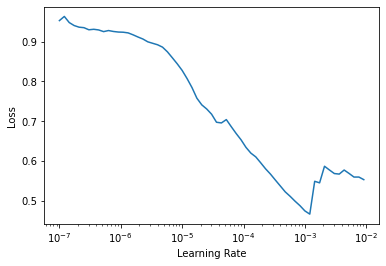

In [ ]:
segmentation_learner.lr_find()

In [ ]:
# stage1
segmentation_learner.fit_one_cycle(10, lr_max=slice(1e-4, 7e-4))

epoch,train_loss,valid_loss,dice_multi,dice_kaggle,time
0,0.077617,0.064304,0.400094,0.864774,07:18
1,0.073341,0.064050,0.395965,0.893417,07:17
2,0.068002,0.061350,0.531013,0.871681,07:14
3,0.055269,0.068252,0.472958,0.880891,07:13
4,0.054680,0.051352,0.545535,0.898572,07:13
5,0.050968,0.049561,0.571110,0.914313,07:12
6,0.048079,0.046953,0.564529,0.914444,07:12
7,0.044176,0.045532,0.641343,0.910027,07:12
8,0.042984,0.044673,0.666555,0.917361,07:12
9,0.039853,0.044556,0.673061,0.915163,07:12


In [ ]:
segmentation_learner.save("ResNet18-Unet-128-stage1")

Path('models/ResNet18-Unet-stage1.pth')

In [ ]:
# stage2
segmentation_learner.fit_one_cycle(5, lr_max=slice(1e-4, 7e-4))

epoch,train_loss,valid_loss,dice_multi,dice_kaggle,time
0,0.047727,0.050091,0.566619,0.915236,07:10
1,0.049110,0.051488,0.614058,0.889133,07:12
2,0.043920,0.045470,0.589829,0.918991,07:12
3,0.042332,0.043937,0.680346,0.920434,07:12
4,0.039790,0.042920,0.683014,0.923082,07:12


In [ ]:
segmentation_learner.save("ResNet18-Unet-128-stage2")

Path('models/ResNet18-Unet-stage2.pth')

### Fine-tuning

In [ ]:
segmentation_learner = segmentation_learner.load("ResNet18-Unet--128-stage2")

In [ ]:
segmentation_learner.validate()

(#3) [0.042923491448163986,0.6830139631164355,0.9230815172195435]

In [ ]:
segmentation_learner.unfreeze()

SuggestedLRs(lr_min=2.7542287716642023e-05, lr_steep=6.309573450380412e-07)

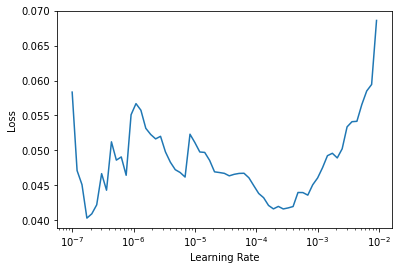

In [ ]:
segmentation_learner.lr_find()

In [ ]:
# stage3
segmentation_learner.fit_one_cycle(10, lr_max=slice(2e-5, 1e-4))

epoch,train_loss,valid_loss,dice_multi,dice_kaggle,time
0,0.042608,0.043629,0.685057,0.922095,10:06
1,0.043650,0.044138,0.688359,0.920928,10:05
2,0.042094,0.044083,0.694718,0.919718,10:05
3,0.038842,0.044115,0.684455,0.919441,10:05
4,0.040834,0.042209,0.695586,0.925560,10:06
5,0.038396,0.042617,0.703305,0.929716,10:06
6,0.035363,0.041282,0.713529,0.929295,10:05
7,0.032947,0.041631,0.719175,0.929696,10:05
8,0.034092,0.041418,0.724688,0.930014,10:05
9,0.034992,0.041048,0.727225,0.929578,10:05


In [ ]:
segmentation_learner.save("ResNet18-Unet-128-stage3")

Path('models/ResNet18-Unet-128-stage3.pth')

### Original size

In [ ]:
segmentation_learner = segmentation_learner.load("ResNet18-Unet-128-stage3")

In [ ]:
orig_dls = get_segmentation_dls(bs // 2, (256, 1600))
segmentation_learner.dls = orig_dls

In [ ]:
segmentation_learner.lr_find()

RuntimeError: CUDA out of memory. Tried to allocate 1.21 GiB (GPU 0; 15.90 GiB total capacity; 12.53 GiB already allocated; 575.50 MiB free; 14.69 GiB reserved in total by PyTorch)

In [ ]:
# to train

## ResNet34

In [ ]:
# bs = 8 # 8 gb
bs = 16 # 16 gb
# bs = 32 # 24 gb
szs = (128, 800)

In [ ]:
dls = get_segmentation_dls(bs, szs)

In [ ]:
x, y = dls.one_batch()
type(x), type(y), x.shape, y.shape

(fastai.torch_core.TensorImage,
 fastai.torch_core.TensorMask,
 (16, 3, 128, 800),
 (16, 128, 800))

In [ ]:
encoder_path = Path("models") / "ResNet34_class.pt"

In [ ]:
arch = resnet34

In [ ]:
segmentation_learner = unet_learner(dls=dls, arch=arch, metrics=metrics, pretrained=True)

In [ ]:
segmentation_learner.model[0].load_state_dict(torch.load(encoder_path), strict=True)

<All keys matched successfully>

### Training

SuggestedLRs(lr_min=0.0009120108559727668, lr_steep=6.30957365501672e-05)

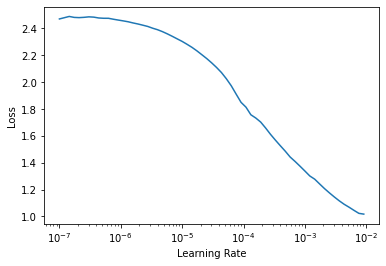

In [ ]:
segmentation_learner.lr_find()

In [ ]:
# stage1
segmentation_learner.fit_one_cycle(10, lr_max=slice(3e-4, 3e-3))

epoch,train_loss,valid_loss,dice_multi,dice_kaggle,time


In [ ]:
segmentation_learner.save("ResNet34-Unet-128-stage1")

# Interpretation

In [ ]:
# segmentation_learner.show_results(figsize=(20,10))

# Export

In [ ]:
!python notebook2script.py 03s_segmentation_model.ipynb

Converted 03s_segmentation_model.ipynb to exp/nb_03s.py


# Old

Here I select the training images from the `train` DataFrame with the images with some patterns (from this [kernel](https://www.kaggle.com/ateplyuk/detector-steels-with-texture/data) idea).

In [ ]:
pattern_imgs = ['000789191.jpg', '00d7ae946.jpg', '01b237ab8.jpg', '01d590c5f.jpg',
       '01e501f99.jpg', '023353d24.jpg', '031614d60.jpg', '03395a3da.jpg',
       '047681252.jpg', '063b5dcbe.jpg', '06a86ee90.jpg', '07cb85a8d.jpg',
       '07e8fca73.jpg', '08e21ba66.jpg', '092c1f666.jpg', '0a3bbea4d.jpg',
       '0a46cc4bf.jpg', '0a5a82b86.jpg', '0a65bd8d4.jpg', '0a76ac9b8.jpg',
       '0b3a0fabe.jpg', '0b50b417a.jpg', '0d0c21687.jpg', '0d22de6d4.jpg',
       '0e09ff3bd.jpg', '0e3ade070.jpg', '0e479a15f.jpg', '0ec90edd8.jpg',
       '0ef4bff49.jpg', '0faa71251.jpg', '0fab4b372.jpg', '0fac62a3e.jpg',
       '100de36e9.jpg', '109fbcecf.jpg', '110e63bfa.jpg', '11872c662.jpg',
       '11b60701f.jpg', '1205a8e2b.jpg', '12e5fd049.jpg', '12ef6188f.jpg',
       '13cf44f8d.jpg', '140c6ef91.jpg', '14b5ab5a6.jpg', '174528b1d.jpg',
       '175a25522.jpg', '175d95f92.jpg', '17a2d22f7.jpg', '17e6e4b30.jpg',
       '17e7e1e08.jpg', '18262cbbb.jpg', '1841b3825.jpg', '1844b698a.jpg',
       '184eb988e.jpg', '18af1ceb1.jpg', '18cc39190.jpg', '18cc78e81.jpg',
       '18dfcd9ae.jpg', '18e2f6396.jpg', '193732cc8.jpg', '194e207f7.jpg',
       '1a20228f6.jpg', '1a4ac4d43.jpg', '1a759ef19.jpg', '1aa7e1c47.jpg',
       '1bb316ba4.jpg', '1bec34f9a.jpg', '1c2b72b46.jpg', '1d4b011c7.jpg',
       '1d849ef03.jpg', '1dfd53dbb.jpg', '1e28fa5c3.jpg', '1e351863b.jpg',
       '1ee9359c6.jpg', '1f151ee84.jpg', '1f2c14ca8.jpg', '1f9f854f3.jpg',
       '1fcabeee5.jpg', '1fccd2eed.jpg', '1fd758653.jpg', '2059da9eb.jpg',
       '219cd030a.jpg', '21d2b3168.jpg', '220129a97.jpg', '223e550cc.jpg',
       '22757e90a.jpg', '22d94f944.jpg', '230ce1940.jpg', '2338ed2ae.jpg',
       '2441b5d16.jpg', '249b7d301.jpg', '255a79790.jpg', '25bc3a693.jpg',
       '26103f6a4.jpg', '26364af58.jpg', '26bcc93ff.jpg', '26e034336.jpg',
       '277c7771d.jpg', '27f331654.jpg', '2854206dc.jpg', '295e39efa.jpg',
       '2995f68a3.jpg', '29c3aaed7.jpg', '2a8096ad1.jpg', '2ab6eed56.jpg',
       '2acd6db1e.jpg', '2b06b596f.jpg', '2c14af3b2.jpg', '2c213b074.jpg',
       '2c67e770e.jpg', '2c8a82986.jpg', '2cf9289c4.jpg', '2d3c47b87.jpg',
       '2d7a69b1f.jpg', '2dd1084fb.jpg', '2e0ef2076.jpg', '2e4308ede.jpg',
       '2eb20e316.jpg', '2f2afbcc4.jpg', '2f473296b.jpg', '2fdafaf26.jpg',
       '303613d84.jpg', '3046d724c.jpg', '306415665.jpg', '30979541d.jpg',
       '329153502.jpg', '33691f767.jpg', '33a835109.jpg', '33e7b3469.jpg',
       '341952a36.jpg', '348bfe68e.jpg', '3503a107c.jpg', '3573170d7.jpg',
       '358e87349.jpg', '35d245aa8.jpg', '3615f1d69.jpg', '364e66340.jpg',
       '366248602.jpg', '36a630d2a.jpg', '374a718ca.jpg', '37f6b9fe0.jpg',
       '383793f65.jpg', '386a3b711.jpg', '386e34822.jpg', '387deae63.jpg',
       '3887e646f.jpg', '38fc3c6f5.jpg', '396851647.jpg', '3977fffae.jpg',
       '3996e2b5c.jpg', '39ac947b9.jpg', '3c0a7290f.jpg', '3c0b48018.jpg',
       '3c6c3dbf1.jpg', '3c9ce987e.jpg', '3d577cf47.jpg', '3e7d00bf4.jpg',
       '3f4cb099f.jpg', '3fdc767bf.jpg', '3feed5ab3.jpg', '404a89d7b.jpg',
       '405f55b63.jpg', '41ddf91f7.jpg', '422003263.jpg', '4281f5d71.jpg',
       '42e6b0f02.jpg', '44c7ae7bc.jpg', '44eaa8416.jpg', '453cb7bd8.jpg',
       '457055016.jpg', '45e2d90b0.jpg', '45f984c71.jpg', '467ba206c.jpg',
       '4687087d5.jpg', '47a0ed2bb.jpg', '47f4eb2de.jpg', '482e2e173.jpg',
       '4956b306e.jpg', '4a4c18443.jpg', '4a6a40fa0.jpg', '4c3e41efe.jpg',
       '4c40deb9a.jpg', '4c5617af0.jpg', '4d1aa2558.jpg', '4d39da061.jpg',
       '4d68a7a1a.jpg', '4d8fac53d.jpg', '4d9fadf79.jpg', '4e15a5ea4.jpg',
       '4e56a3dfc.jpg', '4ed62a0c0.jpg', '5047b4ba0.jpg', '508637e33.jpg',
       '50c83fcaf.jpg', '5122366c6.jpg', '512ac9a49.jpg', '5226a20da.jpg',
       '522ade1d3.jpg', '52b3b763f.jpg', '536f5bd1b.jpg', '54d5658e2.jpg',
       '55728df3e.jpg', '562e2274c.jpg', '57258d636.jpg', '578ba56db.jpg',
       '58499efc0.jpg', '5852d571b.jpg', '585f34f11.jpg', '58d6e5853.jpg',
       '59664a874.jpg', '59ae6ad57.jpg', '59ae6de0b.jpg', '59f53bdb4.jpg',
       '5a4af1a28.jpg', '5b3f3abe1.jpg', '5b4d883bf.jpg', '5ba431673.jpg',
       '5bbb8cea1.jpg', '5c5a0ce34.jpg', '5cd2a9b53.jpg', '5d070ece7.jpg',
       '5d34abcf4.jpg', '5ee800985.jpg', '5eeb58b97.jpg', '5f507f470.jpg',
       '5f7e6cfdd.jpg', '6006371fc.jpg', '602a29dac.jpg', '6100ef061.jpg',
       '614054f86.jpg', '617b8af67.jpg', '6181243e8.jpg', '6195c3cf0.jpg',
       '61a2a3de3.jpg', '625c1af1f.jpg', '62a4c01b4.jpg', '62cf0b008.jpg',
       '635c14be4.jpg', '64945c8c0.jpg', '64b0f37d7.jpg', '64b4c2791.jpg',
       '657f2e15d.jpg', '65829e956.jpg', '65e2c4248.jpg', '661f3fe2b.jpg',
       '665a8347a.jpg', '6724b9623.jpg', '682bdb9ca.jpg', '689491df4.jpg',
       '68db9ad2d.jpg', '692b061c7.jpg', '6951354ff.jpg', '6978ec041.jpg',
       '69b01f980.jpg', '69e3729fa.jpg', '6a09f4e4d.jpg', '6a8fbd4d1.jpg',
       '6b26c1a9a.jpg', '6b6497cef.jpg', '6b665ad9f.jpg', '6c2585cf5.jpg',
       '6ce483b03.jpg', '6ee81c40c.jpg', '6f0b6b59d.jpg', '6f19759f3.jpg',
       '6fc668134.jpg', '7018e55f6.jpg', '710a38fab.jpg', '719061f8f.jpg',
       '71b4288a5.jpg', '725d2e3da.jpg', '72682f66a.jpg', '7280c5e8d.jpg',
       '7303ad5de.jpg', '7311d533d.jpg', '74ec8e2a1.jpg', '75c290dc0.jpg',
       '761bdd88d.jpg', '764b4998b.jpg', '767755f3e.jpg', '7689b3227.jpg',
       '773d61c10.jpg', '774f60117.jpg', '775bddbe7.jpg', '77a034db9.jpg',
       '77d12abf0.jpg', '77dcba76f.jpg', '7868009d5.jpg', '788d11d35.jpg',
       '793b08f01.jpg', '794a1f622.jpg', '79631c4e2.jpg', '79b4672b2.jpg',
       '79b696401.jpg', '79f893f41.jpg', '7a835f759.jpg', '7b0b85b1d.jpg',
       '7b4be079e.jpg', '7b52c0c6c.jpg', '7bb17c5f2.jpg', '7c5b3e03a.jpg',
       '7c67a4611.jpg', '7cf827fc8.jpg', '7d4f862bf.jpg', '7db619168.jpg',
       '7e2607582.jpg', '7e5c4b68d.jpg', '7ed538f87.jpg', '7f98f8f6c.jpg',
       '802e8e4af.jpg', '8088f6b20.jpg', '80adf1a29.jpg', '811ed7a89.jpg',
       '813be2643.jpg', '818614bea.jpg', '822aa8de8.jpg', '82ac8152a.jpg',
       '8366a9a39.jpg', '8369f54aa.jpg', '83886dd5d.jpg', '85f750ca7.jpg',
       '86f7a8b1d.jpg', '870de47b5.jpg', '884bf0558.jpg', '888263bf8.jpg',
       '88b4105df.jpg', '88e6e44c1.jpg', '89c28225d.jpg', '8abee6870.jpg',
       '8b299d9aa.jpg', '8bba1760b.jpg', '8bcf692a1.jpg', '8bf89777a.jpg',
       '8bf8b9c33.jpg', '8c1825273.jpg', '8c7f9bc51.jpg', '8cceaf17c.jpg',
       '8cd4a4a89.jpg', '8dd5b0f4d.jpg', '90047b73a.jpg', '901b85944.jpg',
       '90b0043d9.jpg', '90b45e095.jpg', '90ed657c6.jpg', '9165be267.jpg',
       '916d55994.jpg', '918a753e9.jpg', '91f2a3209.jpg', '9207ba274.jpg',
       '92a84eb98.jpg', '930a3dc72.jpg', '94353a55a.jpg', '945200e71.jpg',
       '94a5728a6.jpg', '94f95f5ec.jpg', '955965785.jpg', '95e38ad8e.jpg',
       '96588d8eb.jpg', '96a82938c.jpg', '9719f1eba.jpg', '9766ccf1b.jpg',
       '976a099e9.jpg', '998d686d8.jpg', '9a08c2783.jpg', '9a2523ce9.jpg',
       '9a81a8056.jpg', '9aa44fa54.jpg', '9bac5408a.jpg', '9c05fdb53.jpg',
       '9ce34209d.jpg', '9d742f4b4.jpg', '9db428c2d.jpg', '9e26c5b98.jpg',
       '9e3aec0e0.jpg', '9edb5294f.jpg', '9efc711f5.jpg', '9f38e4503.jpg',
       '9f88a11c0.jpg', '9f8f010ab.jpg', '9ffe5113f.jpg', 'a09855d99.jpg',
       'a0b425852.jpg', 'a130c38e0.jpg', 'a1547cdfd.jpg', 'a27d1d567.jpg',
       'a2ff5d12e.jpg', 'a3339fb1b.jpg', 'a36c9a89e.jpg', 'a3fe8d17b.jpg',
       'a4a007ea2.jpg', 'a4dc8cd6c.jpg', 'a52aa70f7.jpg', 'a59a92ca2.jpg',
       'a61727238.jpg', 'a6f761c3f.jpg', 'a73cf6a39.jpg', 'a76da9e56.jpg',
       'a77935a71.jpg', 'a7f3a0644.jpg', 'a83442a46.jpg', 'a9bc755fe.jpg',
       'a9f605949.jpg', 'aa0ab8bf3.jpg', 'aa710b314.jpg', 'aa92ea82d.jpg',
       'aae7792ca.jpg', 'ab081e95e.jpg', 'ab13a6f37.jpg', 'ab1865ed6.jpg',
       'ab88df761.jpg', 'ac068dbec.jpg', 'ac9947293.jpg', 'ad9688790.jpg',
       'adcc1cac6.jpg', 'adf017a56.jpg', 'ae691a007.jpg', 'ae8e00590.jpg',
       'af1c8d7bb.jpg', 'af3692d16.jpg', 'af4e9bbc9.jpg', 'af9b9176f.jpg',
       'afcd4d5ee.jpg', 'b05584f2f.jpg', 'b0f641041.jpg', 'b17a3ba1b.jpg',
       'b1ad33d48.jpg', 'b2866fa08.jpg', 'b2b1349c7.jpg', 'b41f45416.jpg',
       'b43445f69.jpg', 'b4b6a1104.jpg', 'b56b55a7e.jpg', 'b688d23eb.jpg',
       'b6a5f38fa.jpg', 'b707e8c7b.jpg', 'b7cd8e6f3.jpg', 'b8fc355a4.jpg',
       'b9def70a3.jpg', 'ba1d5f5b5.jpg', 'ba5e54030.jpg', 'ba61430df.jpg',
       'ba8a923fa.jpg', 'bac478920.jpg', 'bae408bf0.jpg', 'bb52ff5d9.jpg',
       'bb78033f6.jpg', 'bbd271bd8.jpg', 'bbe88f4c8.jpg', 'bcbdbf3ac.jpg',
       'bd23fafce.jpg', 'bd5c85ced.jpg', 'bdf2e7b93.jpg', 'be3f5118b.jpg',
       'bf1683fdd.jpg', 'bf281e816.jpg', 'bfc7f2dfa.jpg', 'bff6601a3.jpg',
       'c0b79eb26.jpg', 'c1102118f.jpg', 'c130e2db0.jpg', 'c1e29d626.jpg',
       'c1e621914.jpg', 'c1ee793b9.jpg', 'c23ac4775.jpg', 'c27f43f5c.jpg',
       'c2a4d7a03.jpg', 'c2cff3176.jpg', 'c3c2bebd8.jpg', 'c4562eb61.jpg',
       'c521c444d.jpg', 'c54ee8ab4.jpg', 'c54f5ce35.jpg', 'c59bddadd.jpg',
       'c5cf9f24e.jpg', 'c633454bd.jpg', 'c645ee923.jpg', 'c6b51947f.jpg',
       'c6c8a3760.jpg', 'c70599c3a.jpg', 'c71cc5004.jpg', 'c88792f29.jpg',
       'c92d43a0f.jpg', 'c98cafcf4.jpg', 'c9c186f0b.jpg', 'cb1f7d883.jpg',
       'cc2a3d558.jpg', 'cc5f6debe.jpg', 'cd7186a59.jpg', 'cd8bf9803.jpg',
       'ce06d92b1.jpg', 'ceb4d3861.jpg', 'cebd47968.jpg', 'cececa61c.jpg',
       'cedd9ca39.jpg', 'cee644043.jpg', 'cf5df8ebd.jpg', 'cf78b36e0.jpg',
       'd0274160d.jpg', 'd07524f7c.jpg', 'd0c84eccb.jpg', 'd0f88f6d2.jpg',
       'd1267facd.jpg', 'd1517f67e.jpg', 'd19e7a3c2.jpg', 'd2391cadf.jpg',
       'd25a9387d.jpg', 'd3034da7a.jpg', 'd352c88ea.jpg', 'd37231205.jpg',
       'd3ba7a242.jpg', 'd3f297e2d.jpg', 'd43429032.jpg', 'd47afce21.jpg',
       'd4bd2a591.jpg', 'd501fc917.jpg', 'd5b0b7372.jpg', 'd6322390f.jpg',
       'd717541d8.jpg', 'd7af729ba.jpg', 'd7b5d31e5.jpg', 'd85e86732.jpg',
       'd86b4b652.jpg', 'd8c10c73f.jpg', 'd8e384009.jpg', 'd91c205e6.jpg',
       'd9285f64c.jpg', 'd97ec0357.jpg', 'd9845d7ae.jpg', 'dbbd64250.jpg',
       'dc3959c7b.jpg', 'dcd2b0763.jpg', 'dd3bf4f47.jpg', 'dd4364aa4.jpg',
       'ddb6adb93.jpg', 'de5f11a6b.jpg', 'de6d967a7.jpg', 'deca512a1.jpg',
       'df052e6d3.jpg', 'df233f70a.jpg', 'df997913a.jpg', 'e03364e95.jpg',
       'e0354613c.jpg', 'e0524919c.jpg', 'e1c960f0b.jpg', 'e2cc5ba4f.jpg',
       'e3228a3cf.jpg', 'e335e17b2.jpg', 'e38fb8774.jpg', 'e40347dd6.jpg',
       'e4173df9a.jpg', 'e4b71594a.jpg', 'e4d0d99fd.jpg', 'e4fefe327.jpg',
       'e523f2341.jpg', 'e54b50c33.jpg', 'e573261f9.jpg', 'e59ee3b8e.jpg',
       'e65c374a9.jpg', 'e66f146bd.jpg', 'e74522431.jpg', 'e7e3c3df2.jpg',
       'e7e8fd526.jpg', 'e81458200.jpg', 'e850c3a86.jpg', 'e8b114d2a.jpg',
       'e91f2be81.jpg', 'e943bbc5b.jpg', 'ecb2bea37.jpg', 'ecf1f5bb7.jpg',
       'ed0d0866c.jpg', 'eda0fd38d.jpg', 'ee3be2a71.jpg', 'ef6febf17.jpg',
       'ef96ba685.jpg', 'efb8d2080.jpg', 'efbe1db43.jpg', 'f157238ea.jpg',
       'f1a782eb5.jpg', 'f30cde286.jpg', 'f34262e93.jpg', 'f41c0d27c.jpg',
       'f4222bcd7.jpg', 'f4b95bb65.jpg', 'f6c9b6570.jpg', 'f6ff3d051.jpg',
       'f7202186a.jpg', 'f8981ac65.jpg', 'f8aa3fcc1.jpg', 'f8cdb7672.jpg',
       'f8e2dbdf4.jpg', 'f91d56c49.jpg', 'f939530e3.jpg', 'f95867a2b.jpg',
       'fb6ed1e5a.jpg', 'fd319a9a3.jpg', 'fdc7bc599.jpg', 'fde8b6a20.jpg',
       'ff18dded1.jpg', 'ff3bac947.jpg']

In [ ]:
def check_img_paths(name: str):
    path = train_path / name    
    return path.is_file()

for num, img_name in enumerate(pattern_imgs):
    if not check_img_paths(img_name):
        print(f"Img {img_nameme}, num {num} not found!")

In [ ]:
train_imgs_df = train["ImageId"].drop_duplicates().to_frame()
print(train_imgs_df.shape)
train_imgs_df.isna().any()

(6666, 1)


ImageId    False
dtype: bool

In [ ]:
pattern_imgs_df = pd.Series(pattern_imgs, name="ImageId").drop_duplicates().to_frame()
print(pattern_imgs_df.shape)
pattern_imgs_df.isna().any()

(598, 1)


ImageId    False
dtype: bool

In [ ]:
nohardneg_df = pd.merge(pattern_imgs_df, train_imgs_df, how='outer')
print(nohardneg_df.info())
# nohardneg_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7261 entries, 0 to 7260
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  7261 non-null   object
dtypes: object(1)
memory usage: 113.5+ KB
None


In [ ]:
common_imgs = pd.merge(pattern_imgs_df, train_imgs_df, how='inner')
common_imgs["ImageId"] = common_imgs["ImageId"].drop_duplicates()
common_imgs.head()

,ImageId
0,306415665.jpg
1,6ee81c40c.jpg
2,a9f605949.jpg


In [ ]:
# img_path = train_path/"306415665.jpg"
# Image.open(img_path)

In [ ]:
# img_path = train_path/"6ee81c40c.jpg"
# Image.open(img_path)

In [ ]:
# img_path = train_path/"a9f605949.jpg"
# Image.open(img_path)

In [ ]:
# bs = 16 # 8 gb
bs = 16 # 16 gb
size = (128,800)

In [ ]:
dls = get_df_dls(train_df=nohardneg_df, bs=bs, size=size)

In [ ]:
len(dls.train.dataset), len(dls.valid.dataset)

(5809, 1452)

In [ ]:
# dls.show_batch(figsize=(40,40))